In [1]:
import pandas as pd
import numpy as np
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import * 
import nltk
import matplotlib.pyplot as plt

In [2]:
nltk.download('wordnet')
np.random.seed(5757)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ihsankahveci/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
documents = pd.read_csv('sermons_df', sep=';', index_col=0)

In [4]:
documents

,date,sermon
0,2019-02-01,\nDATE: 01.02.2019\n [pic]RIFQ (GENTLENE...
1,2018-03-02,\nLOCATION : NATIONWIDE\nDATE : 02.03.2018...
2,2019-12-27,\nDATE: 27.12.2019\n ...
3,2017-08-25,LOCATION\t: NATIONWIDE\n\n\tDATE\t: 25.08.2017...
4,2019-10-25,\nDATE: 25.10.2019\n[pic]\n\n FOR...
...,...,...
152,2019-04-12,\nDATE: 12.04.2019\n ...
153,2017-09-01,\nLOCATION : NATIONWIDE\nDATE : 01.09.2017...
154,2017-02-03,\n LOCATION : NATIONWIDE\n DATE : 03....
155,2019-08-23,\nDATE: 23.08.2019\n[pic]\n SOCIAL HARMS OF...


In [5]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [6]:
doc_sample = documents.sermon[1]

In [7]:
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['\nLOCATION', '', '', '', ':', 'NATIONWIDE\nDATE', '', ':', '02.03.2018\n[pic]\n\n', '', '', 'ETHICS', 'OF', 'COMMERCE', 'IN', 'ISLAM\n\n', '', '', "Jumu'ah", 'Mubarak,', 'Dear', 'Brothers', 'and', 'Sisters!\n', '', '', 'The', 'Messenger', 'of', 'Allah', '(s.a.w.)', '', 'occasionally', '', 'went', '', 'to', '', 'the', '', 'market', '', 'in\nMadinah', 'to', 'buy', 'his', 'needs.', 'He', 'watched', 'people', 'shopping', 'and', '', 'had', '', 'conversations\nwith', 'them.', 'One', 'day', 'when', 'he', 'was', '', 'walking', '', 'around', '', 'the', '', 'marketplace,', '', 'a', '', 'wheat\nsalesman', 'caught', 'his', 'attention.', 'The', 'wheat', 'pile', 'looked', 'dry', 'but', 'when', '', 'he', '', 'stuck\nhis', 'hand', 'in', 'it,', 'he', 'found', 'that', 'the', '', 'bottom', '', 'of', '', 'the', '', 'sack', '', 'was', '', 'not', '', 'what', '', 'it\nappeared', 'to', 'be.', 'The', 'fingers', '', 'of', '', 'our', '', 'Prophet', '', 'got', '', 'wet', '', 'and', '', 'he',

['locat', 'nationwid', 'date', 'ethic', 'commerc', 'islam', 'jumu', 'mubarak', 'dear', 'brother', 'sister', 'messeng', 'allah', 'occasion', 'go', 'market', 'madinah', 'need', 'watch', 'peopl', 'shop', 'convers', 'walk', 'marketplac', 'wheat', 'salesman', 'catch', 'attent', 'wheat', 'pile', 'look', 'stick', 'hand', 'sack', 'appear', 'finger', 'prophet', 'ask', 'salesman', 'say', 'wheat', 'rain', 'prophet', 'say', 'shouldn', 'peopl', 'warn', 'deceiv', 'honor', 'believ', 'religion', 'deem', 'essenti', 'person', 'live', 'life', 'self', 'suffici', 'provid', 'susten', 'famili', 'effort', 'earn', 'susten', 'halal', 'law', 'mean', 'engag', 'busi', 'trade', 'worthi', 'prais', 'kind', 'trade', 'respect', 'allah', 'counten', 'debt', 'halal', 'haram', 'sensit', 'forbid', 'religion', 'almighti', 'lord', 'enjoin', 'vers', 'recit', 'begin', 'deal', 'fraud', 'measur', 'peopl', 'measur', 'weight', 'brother', 'sister', 'islam', 'provid', 'human', 'roadmap', 'peac', 'balanc', 'righteous', 'life', 'princi

In [8]:
processed_docs = documents['sermon'].map(preprocess)

In [82]:
documents.date.count()

157

In [74]:
processed_docs

0      [date, rifq, gentl, allah, love, gracious, aff...
1      [locat, nationwid, date, ethic, commerc, islam...
2      [date, life, contempl, honor, muslim, vers, re...
3      [locat, nationwid, date, sacrific, search, clo...
4      [date, soldier, mehmetcik, prayer, dear, musli...
                             ...                        
152    [date, iman, reflect, live, dear, muslim, iman...
153    [locat, nationwid, date, manifest, faith, isla...
154    [locat, nationwid, date, marriag, pact, agreem...
155    [date, social, harm, dear, muslim, tenth, year...
156    [date, sincer, essenc, faith, honor, muslim, v...
Name: sermon, Length: 157, dtype: object

In [10]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [11]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break


0 abandon
1 adab
2 advis
3 affair
4 allah
5 almighti
6 anger
7 angri
8 approach
9 attack
10 attempt


In [12]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [13]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[57]

[(3, 1),
 (6, 3),
 (7, 2),
 (11, 2),
 (24, 1),
 (30, 2),
 (37, 2),
 (40, 2),
 (48, 1),
 (55, 1),
 (57, 2),
 (63, 4),
 (66, 2),
 (78, 1),
 (83, 1),
 (86, 1),
 (94, 1),
 (95, 1),
 (101, 3),
 (114, 2),
 (115, 1),
 (140, 1),
 (141, 1),
 (146, 1),
 (157, 4),
 (158, 1),
 (163, 1),
 (169, 1),
 (171, 2),
 (179, 1),
 (186, 1),
 (203, 2),
 (205, 1),
 (208, 2),
 (213, 1),
 (217, 1),
 (225, 2),
 (235, 1),
 (240, 3),
 (245, 1),
 (246, 1),
 (247, 3),
 (250, 1),
 (272, 2),
 (276, 1),
 (280, 1),
 (282, 1),
 (288, 1),
 (291, 3),
 (299, 1),
 (301, 1),
 (306, 4),
 (310, 2),
 (321, 1),
 (340, 2),
 (345, 1),
 (352, 1),
 (355, 2),
 (366, 2),
 (368, 1),
 (371, 1),
 (386, 1),
 (388, 1),
 (394, 1),
 (401, 1),
 (406, 1),
 (415, 1),
 (429, 2),
 (430, 1),
 (436, 1),
 (438, 1),
 (444, 4),
 (447, 1),
 (454, 1),
 (465, 1),
 (473, 1),
 (478, 1),
 (484, 1),
 (491, 1),
 (501, 1)]

In [14]:
bow_doc_57 = bow_corpus[57]

for i in range(len(bow_doc_57)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_57[i][0], 
                                                     dictionary[bow_doc_57[i][0]], 
                                                     bow_doc_57[i][1]))

Word 3 ("affair") appears 1 time.
Word 6 ("avoid") appears 3 time.
Word 7 ("away") appears 2 time.
Word 11 ("bestow") appears 2 time.
Word 24 ("deed") appears 1 time.
Word 30 ("evil") appears 2 time.
Word 37 ("forgiv") appears 2 time.
Word 40 ("grace") appears 2 time.
Word 48 ("imran") appears 1 time.
Word 55 ("mind") appears 1 time.
Word 57 ("nation") appears 2 time.
Word 63 ("oppress") appears 4 time.
Word 66 ("patient") appears 2 time.
Word 78 ("seek") appears 1 time.
Word 83 ("stand") appears 1 time.
Word 86 ("today") appears 1 time.
Word 94 ("accept") appears 1 time.
Word 95 ("accord") appears 1 time.
Word 101 ("awar") appears 3 time.
Word 114 ("duti") appears 2 time.
Word 115 ("earn") appears 1 time.
Word 140 ("locat") appears 1 time.
Word 141 ("look") appears 1 time.
Word 146 ("nationwid") appears 1 time.
Word 157 ("servant") appears 4 time.
Word 158 ("short") appears 1 time.
Word 163 ("spiritu") appears 1 time.
Word 169 ("thing") appears 1 time.
Word 171 ("trust") appears 2 tim

In [15]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [16]:
corpus_tfidf = tfidf[bow_corpus]

In [17]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.08104237486966683),
 (1, 0.2770717282223785),
 (2, 0.08518632552791239),
 (3, 0.22663612920658202),
 (4, 0.08981886823227393),
 (5, 0.08104237486966683),
 (6, 0.11584809416259773),
 (7, 0.030119261358854253),
 (8, 0.07912340141302156),
 (9, 0.07226588150705975),
 (10, 0.12034430690752336),
 (11, 0.045798198851517195),
 (12, 0.05792404708129886),
 (13, 0.24917939797859512),
 (14, 0.08104237486966683),
 (15, 0.04346100715463044),
 (16, 0.03654302427916214),
 (17, 0.034084026495704516),
 (18, 0.044224742878274166),
 (19, 0.06923891495242487),
 (20, 0.11349805754269733),
 (21, 0.07072328560124397),
 (22, 0.0625565897856604),
 (23, 0.14144657120248794),
 (24, 0.06816805299140903),
 (25, 0.12269260988463608),
 (26, 0.07072328560124397),
 (27, 0.08743443190037521),
 (28, 0.03718256932836126),
 (29, 0.049147553718691776),
 (30, 0.029056192484958682),
 (31, 0.10372224593281607),
 (32, 0.047437234087836996),
 (33, 0.04660917921017287),
 (34, 0.056846413810303614),
 (35, 0.0625565897856604

In [18]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=20, id2word=dictionary, passes=2, workers=2)

In [19]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.062*"famili" + 0.032*"repent" + 0.022*"spous" + 0.014*"forgiv" + 0.011*"night" + 0.010*"remain" + 0.010*"children" + 0.009*"best" + 0.009*"kind" + 0.009*"mistak"
Topic: 1 
Words: 0.015*"famili" + 0.013*"deed" + 0.012*"happi" + 0.012*"evil" + 0.009*"lose" + 0.009*"spend" + 0.009*"thing" + 0.009*"wealth" + 0.009*"heaven" + 0.009*"caus"
Topic: 2 
Words: 0.019*"religion" + 0.014*"famili" + 0.013*"women" + 0.011*"evil" + 0.011*"pbuh" + 0.011*"oppress" + 0.011*"word" + 0.010*"principl" + 0.009*"happi" + 0.008*"grant"
Topic: 3 
Words: 0.058*"mosqu" + 0.042*"friday" + 0.015*"khutbah" + 0.013*"place" + 0.012*"ramadan" + 0.010*"month" + 0.009*"soul" + 0.008*"servant" + 0.008*"masjid" + 0.008*"best"
Topic: 4 
Words: 0.027*"sacrific" + 0.015*"sunnah" + 0.012*"word" + 0.010*"respect" + 0.010*"share" + 0.009*"haram" + 0.009*"halal" + 0.009*"person" + 0.008*"relat" + 0.008*"nation"
Topic: 5 
Words: 0.026*"deed" + 0.015*"evil" + 0.009*"fact" + 0.009*"surah" + 0.009*"paradis" + 0.008

In [65]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=, id2word=dictionary, passes=2, workers=4)

In [66]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.008*"repent" + 0.006*"book" + 0.006*"evil" + 0.006*"truth" + 0.006*"knowledg" + 0.006*"pbuh" + 0.005*"children" + 0.005*"friday" + 0.005*"refug" + 0.005*"natur"
Topic: 1 Word: 0.010*"homeland" + 0.010*"martyr" + 0.007*"piec" + 0.006*"nation" + 0.006*"night" + 0.006*"fight" + 0.005*"anybodi" + 0.005*"land" + 0.005*"arrog" + 0.005*"humbl"
Topic: 2 Word: 0.009*"mosqu" + 0.008*"ramadan" + 0.008*"month" + 0.005*"famili" + 0.005*"night" + 0.005*"masjid" + 0.005*"sacrific" + 0.005*"oppress" + 0.005*"perform" + 0.004*"nation"
Topic: 3 Word: 0.006*"sunnah" + 0.006*"tell" + 0.006*"deed" + 0.006*"paradis" + 0.005*"wast" + 0.005*"word" + 0.005*"quran" + 0.005*"women" + 0.005*"adam" + 0.004*"pbuh"
Topic: 4 Word: 0.008*"name" + 0.007*"gratitud" + 0.006*"iman" + 0.005*"natur" + 0.005*"father" + 0.005*"foundat" + 0.005*"surah" + 0.004*"slave" + 0.004*"children" + 0.004*"elder"


In [63]:
print(processed_docs[57])

['locat', 'nationwid', 'date', 'abl', 'servant', 'allah', 'love', 'bless', 'friday', 'brother', 'sister', 'vers', 'recit', 'allah', 'almighti', 'show', 'honor', 'love', 'favor', 'muhammad', 'love', 'allah', 'follow', 'allah', 'love', 'forgiv', 'sin', 'allah', 'forgiv', 'merci', 'brother', 'sister', 'almighti', 'state', 'deed', 'away', 'grace', 'book', 'like', 'show', 'one', 'bring', 'favor', 'state', 'one', 'honor', 'love', 'leav', 'love', 'merci', 'come', 'hear', 'today', 'khutbah', 'servant', 'lord', 'love', 'allah', 'love', 'pure', 'spiritu', 'materi', 'sens', 'come', 'protect', 'disposit', 'evil', 'mind', 'heart', 'center', 'good', 'nice', 'thing', 'evil', 'ugli', 'allah', 'love', 'repent', 'honor', 'brother', 'sister', 'come', 'servant', 'repent', 'voic', 'submiss', 'lord', 'remors', 'sin', 'refug', 'vast', 'merci', 'forget', 'repent', 'like', 'start', 'life', 'allah', 'love', 'avoid', 'disobey', 'come', 'awar', 'duti', 'oblig', 'live', 'live', 'accord', 'purpos', 'reason', 'creat

In [58]:
for index, score in sorted(lda_model[bow_corpus[57]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9921483993530273	 
Topic: 0.027*"children" + 0.018*"wast" + 0.014*"book" + 0.011*"away" + 0.010*"spend" + 0.010*"year" + 0.009*"respons" + 0.008*"forget" + 0.008*"arrog" + 0.008*"grant"


In [59]:
for index, score in sorted(lda_model_tfidf[bow_corpus[57]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.6052870750427246	 
Topic: 0.012*"mosqu" + 0.011*"sacrific" + 0.010*"forgiv" + 0.007*"night" + 0.007*"sin" + 0.007*"perform" + 0.007*"reach" + 0.007*"forget" + 0.007*"truth" + 0.007*"year"

Score: 0.18585769832134247	 
Topic: 0.013*"month" + 0.009*"quran" + 0.009*"piec" + 0.008*"nation" + 0.008*"night" + 0.008*"oppress" + 0.008*"ramadan" + 0.007*"struggl" + 0.006*"homeland" + 0.006*"natur"

Score: 0.1639634221792221	 
Topic: 0.010*"children" + 0.009*"masjid" + 0.008*"gain" + 0.008*"halal" + 0.008*"homeland" + 0.007*"famili" + 0.007*"mosqu" + 0.006*"haram" + 0.006*"earn" + 0.006*"properti"

Score: 0.03882932662963867	 
Topic: 0.008*"understand" + 0.008*"correct" + 0.008*"law" + 0.007*"show" + 0.007*"work" + 0.007*"actual" + 0.006*"compass" + 0.006*"line" + 0.006*"justic" + 0.006*"oppress"


In [25]:
unseen_document = 'democracy is not religious and turkish and kurdish are brothers'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.05000000074505806	 Topic: 0.062*"famili" + 0.032*"repent" + 0.022*"spous" + 0.014*"forgiv" + 0.011*"night"
Score: 0.05000000074505806	 Topic: 0.015*"famili" + 0.013*"deed" + 0.012*"happi" + 0.012*"evil" + 0.009*"lose"
Score: 0.05000000074505806	 Topic: 0.019*"religion" + 0.014*"famili" + 0.013*"women" + 0.011*"evil" + 0.011*"pbuh"
Score: 0.05000000074505806	 Topic: 0.058*"mosqu" + 0.042*"friday" + 0.015*"khutbah" + 0.013*"place" + 0.012*"ramadan"
Score: 0.05000000074505806	 Topic: 0.027*"sacrific" + 0.015*"sunnah" + 0.012*"word" + 0.010*"respect" + 0.010*"share"
Score: 0.05000000074505806	 Topic: 0.026*"deed" + 0.015*"evil" + 0.009*"fact" + 0.009*"surah" + 0.009*"paradis"
Score: 0.05000000074505806	 Topic: 0.028*"nation" + 0.023*"homeland" + 0.020*"caus" + 0.018*"truth" + 0.017*"martyr"
Score: 0.05000000074505806	 Topic: 0.037*"nation" + 0.023*"homeland" + 0.017*"night" + 0.016*"martyr" + 0.014*"young"
Score: 0.05000000074505806	 Topic: 0.027*"children" + 0.018*"wast" + 0.014*

In [60]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [67]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_tfidf, corpus=corpus_tfidf, texts=processed_docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.9117,"mosqu, ramadan, month, famili, night, masjid, ...","[date, rifq, gentl, allah, love, gracious, aff..."
1,1,2.0,0.9063,"mosqu, ramadan, month, famili, night, masjid, ...","[locat, nationwid, date, ethic, commerc, islam..."
2,2,2.0,0.9193,"mosqu, ramadan, month, famili, night, masjid, ...","[date, life, contempl, honor, muslim, vers, re..."
3,3,2.0,0.8650,"mosqu, ramadan, month, famili, night, masjid, ...","[locat, nationwid, date, sacrific, search, clo..."
4,4,2.0,0.9122,"mosqu, ramadan, month, famili, night, masjid, ...","[date, soldier, mehmetcik, prayer, dear, musli..."
5,5,0.0,0.5125,"repent, book, evil, truth, knowledg, pbuh, chi...","[date, messag, revel, human, read, jumu, mubar..."
6,6,2.0,0.9109,"mosqu, ramadan, month, famili, night, masjid, ...","[date, funer, etiquett, duti, travel, etern, l..."
7,7,2.0,0.9185,"mosqu, ramadan, month, famili, night, masjid, ...","[date, worship, spiritu, world, jumu, mubarak,..."
8,8,2.0,0.9250,"mosqu, ramadan, month, famili, night, masjid, ...","[date, preserv, famili, environ, righteous, pe..."
9,9,2.0,0.9202,"mosqu, ramadan, month, famili, night, masjid, ...","[date, juli, rebirth, nation, jumu, mubarak, h..."


In [30]:
import seaborn as sns
import matplotlib.colors as mcolors

/Users/ihsankahveci/miniconda3/envs/selenium/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/ihsankahveci/miniconda3/envs/selenium/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


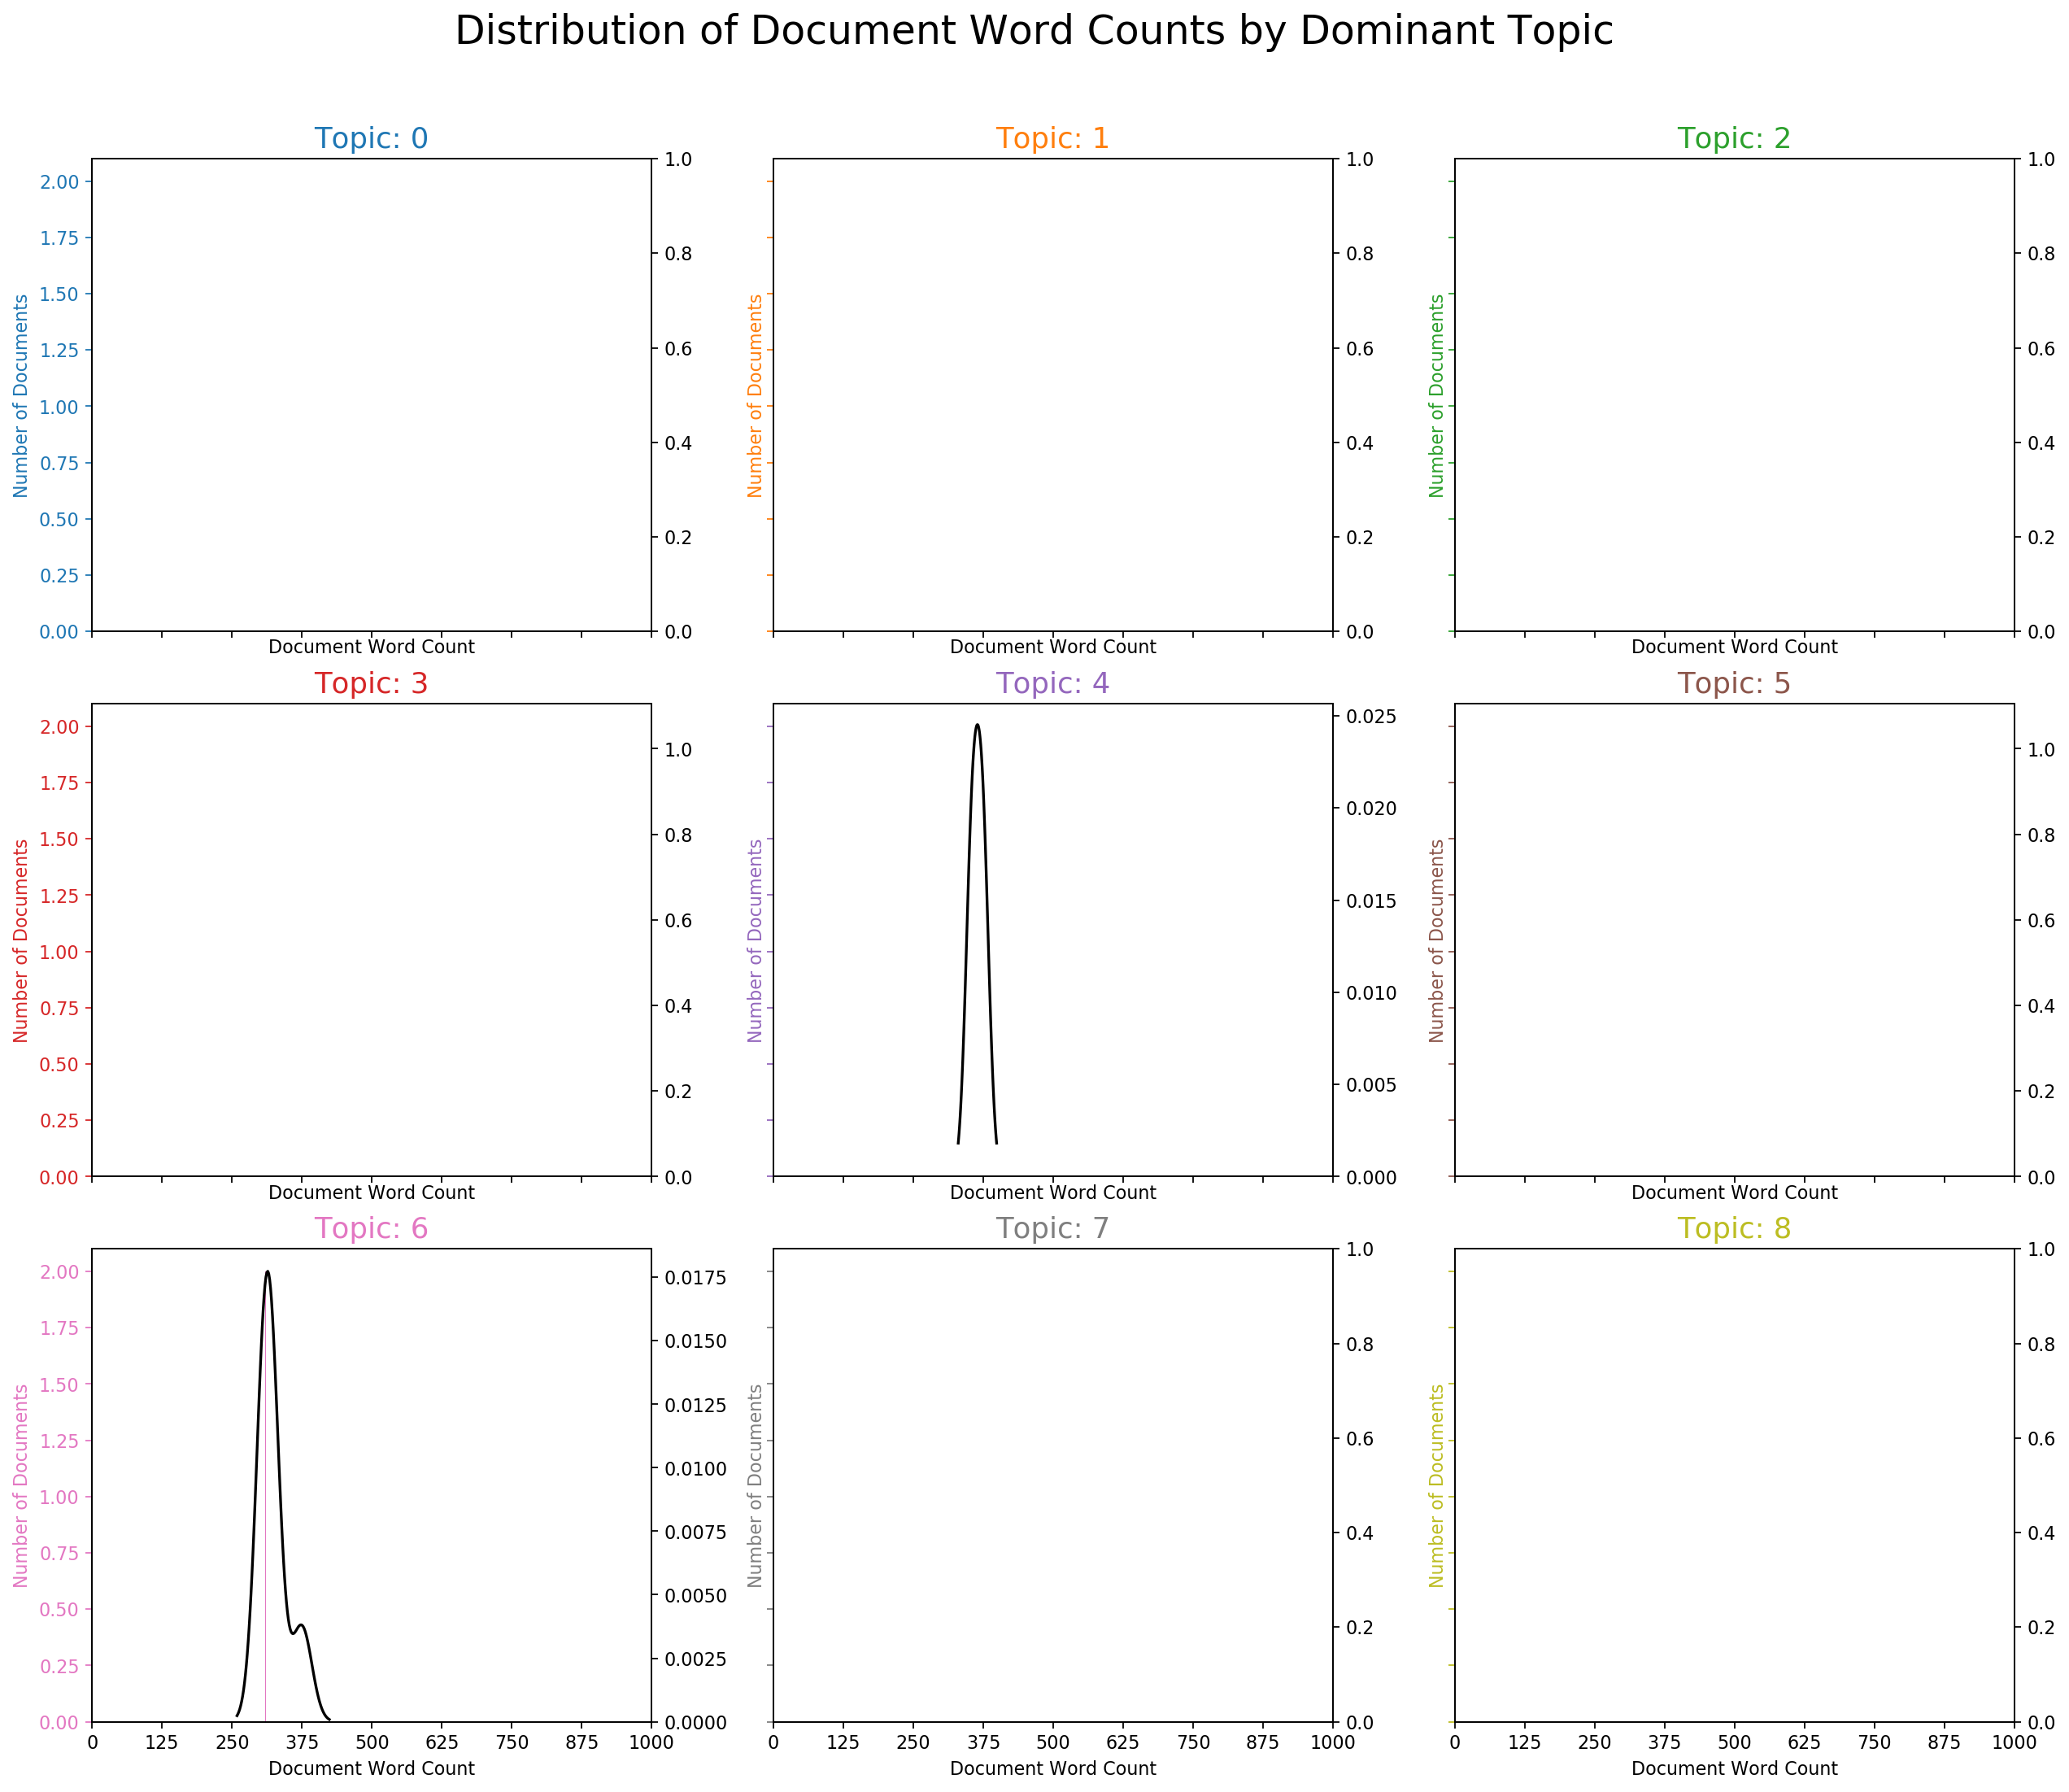

In [50]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,3,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

In [44]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [68]:
vis = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus_tfidf, dictionary=lda_model.id2word)

/Users/ihsankahveci/miniconda3/envs/selenium/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [69]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.021395  0.004898       1        1  74.414032
0     -0.018025  0.015831       2        1  12.670086
3     -0.019146 -0.013381       3        1   7.903486
1      0.008748 -0.013956       4        1   2.554351
4      0.007027  0.006608       5        1   2.458038, topic_info=    Category      Freq      Term     Total  loglift  logprob
44   Default  3.000000  homeland  3.000000  30.0000  30.0000
144  Default  3.000000    martyr  3.000000  29.0000  29.0000
57   Default  4.000000    nation  4.000000  28.0000  28.0000
220  Default  5.000000     night  5.000000  27.0000  27.0000
313  Default  4.000000      land  4.000000  26.0000  26.0000
..       ...       ...       ...       ...      ...      ...
24    Topic5  0.102716      deed  3.601799   0.1486  -5.6575
266   Topic5  0.097905      anim  3.088586   0.2543  -5.7055
177   Topic5  0.096450    wealth  3.023983   0.2605  -5.7204
236   Topic5  0.103140   ramadan  7.553350  -0.5878  -5.6534
262   Topic5  0.096473      year  3.764795   0.0416  -5.7202

[262 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.781913  abandon
497       1  0.824594     abid
179       1  0.532386      abl
179       2  0.532386      abl
181       1  0.504553  account
...     ...       ...      ...
336       1  0.426113    women
337       1  0.725184     word
501       1  0.605810    write
262       1  0.796856     year
338       1  0.820977    young

[228 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2, 5])